In [1]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#loading csv file
df=pd.read_csv("diwalisale.csv",encoding="unicode_escape")
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
#droping null columns
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [4]:
df.dropna(axis=0, how="any",inplace=True)

In [5]:
df.isnull().count()

User_ID             11239
Cust_name           11239
Product_ID          11239
Gender              11239
Age Group           11239
Age                 11239
Marital_Status      11239
State               11239
Zone                11239
Occupation          11239
Product_Category    11239
Orders              11239
Amount              11239
dtype: int64

In [6]:
df["Amount"]=df["Amount"].astype(int)

In [7]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


# Count the number of Male and Female?

In [134]:
gender_count=df.groupby("Gender").size()
print(gender_count)

Gender
F    7832
M    3407
dtype: int64


# Show sales by Gender

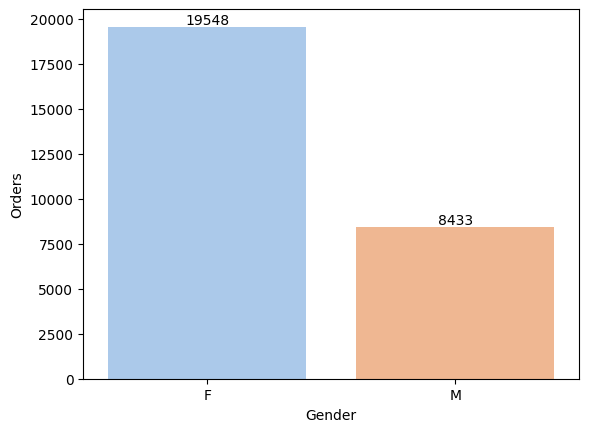

In [142]:
gender_sales= df.groupby('Gender')['Orders'].sum().reset_index()
ax=sns.barplot(x="Gender",y="Orders",data=gender_sales,palette="pastel")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

# Which age group is more active.

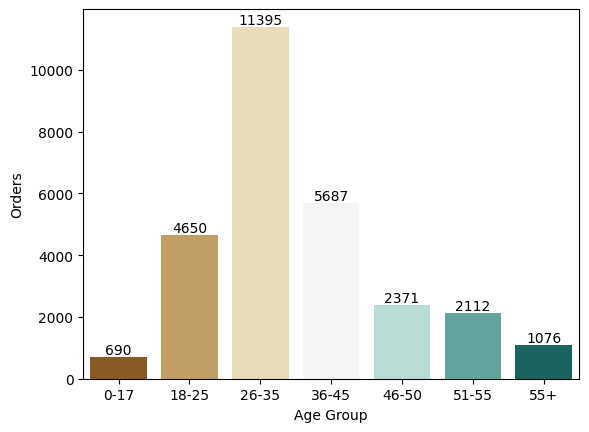

In [14]:
active_group=df.groupby("Age Group")["Orders"].sum().reset_index()
ax=sns.barplot(x="Age Group",y="Orders",data=active_group,palette="BrBG")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

# Which age group is spending more.

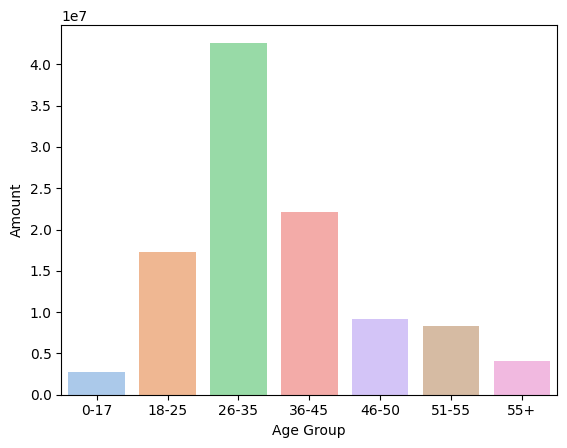

In [108]:
group_expenditure=df.groupby("Age Group",as_index=False)["Amount"].sum()
sns.barplot(x="Age Group", y="Amount",data=group_expenditure,palette="pastel")
plt.show()

# Total no. of orders from top 10 state.

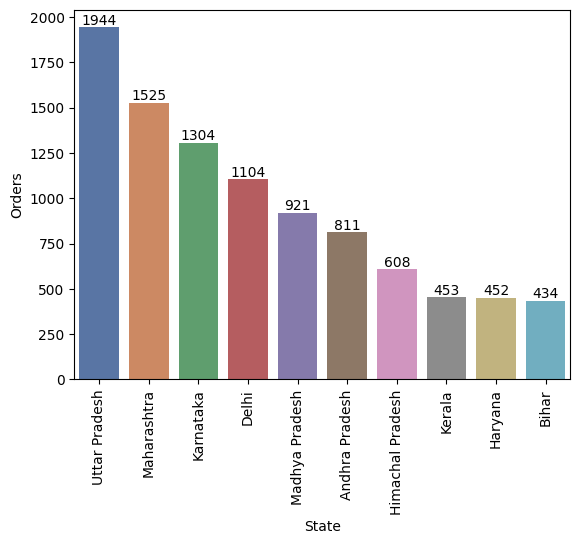

In [144]:
total_orders=df.groupby(["State"],as_index=False)["Orders"].count().sort_values("Orders",ascending=False).head(10)
lab=sns.barplot(x="State",y="Orders",data=total_orders,palette="deep")
for bar in lab.containers:
    lab.bar_label(bar)
plt.xticks(rotation=90)
plt.show()

# Total sales from top 10 states.

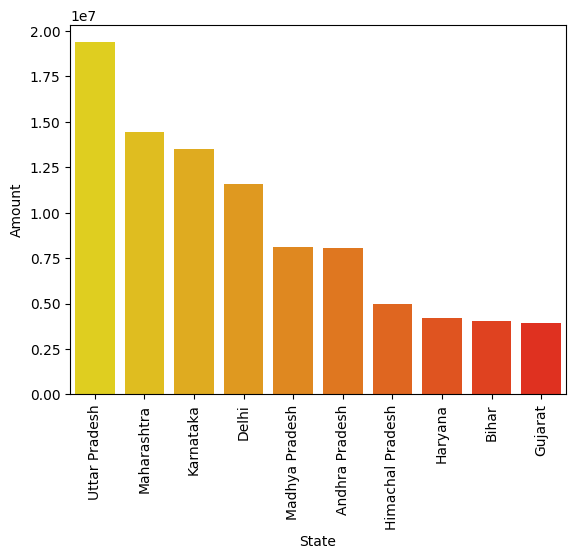

In [20]:
total_sales=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values("Amount",ascending=False).head(10)
sns.barplot(x="State",y="Amount",data=total_sales,palette="autumn_r")
plt.xticks(rotation=90)
plt.show()

# Buyers according to marital status

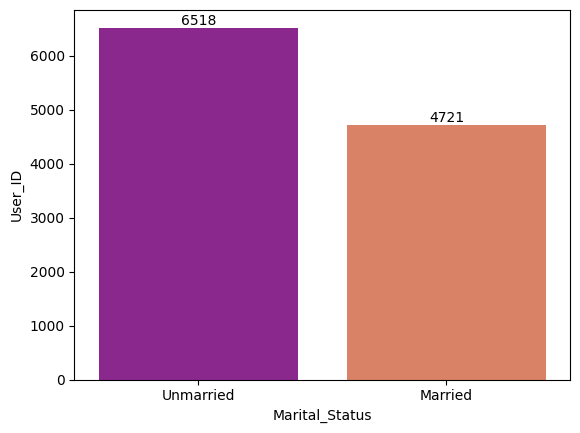

In [22]:
buyers=df.groupby(["Marital_Status"],as_index=False)["User_ID"].count()
lab=sns.barplot(x="Marital_Status",y="User_ID",data=buyers,palette="plasma")
for bar in lab.containers:
    lab.bar_label(bar)
plt.xticks(ticks=range(len(buyers["Marital_Status"])),labels=["Unmarried", "Married"])
# in this case range(len(buyers["Marital_Status"]) would be equal to [0,1]
plt.show()

# Orders placed by marital status and gender

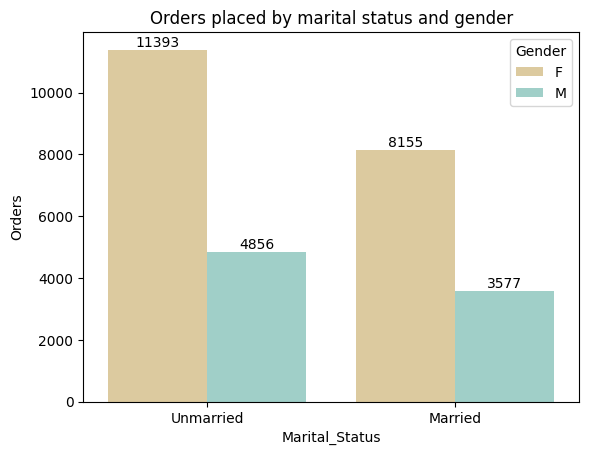

In [114]:
expense=df.groupby(["Marital_Status","Gender"],as_index=False)["Orders"].sum().sort_values("Orders",ascending=False)
ax=sns.barplot(x="Marital_Status",y="Orders",data=expense,hue="Gender",palette="BrBG")
plt.xticks(ticks=range(len(buyers["Marital_Status"])),labels=["Unmarried", "Married"])
plt.title("Orders placed by marital status and gender")
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

# Count of buyers from different occupation

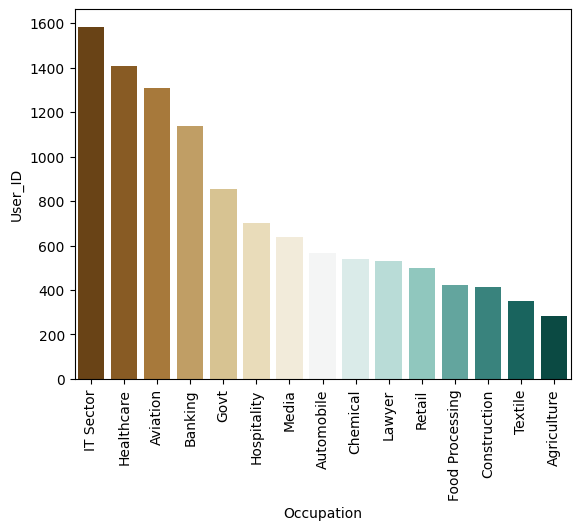

In [122]:
occupation=df.groupby("Occupation",as_index=False)["User_ID"].count().sort_values("User_ID",ascending=False)
sns.barplot(x="Occupation",y="User_ID",data=occupation,palette="BrBG")
plt.xticks(rotation=90)
plt.show()

# Amount spend from different Occupation

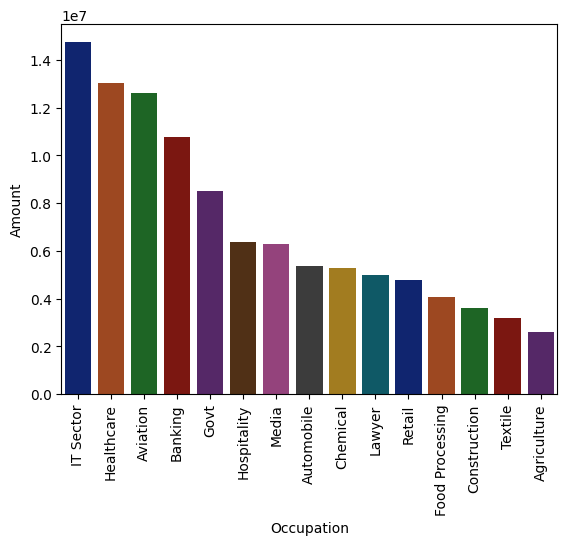

In [146]:
amount=df.groupby("Occupation",as_index=False)["Amount"].sum().sort_values("Amount",ascending=False)
sns.barplot(x="Occupation",y="Amount",data=amount,palette="dark")
plt.xticks(rotation=90)
plt.show()

# Top 5 Product category by purchase order

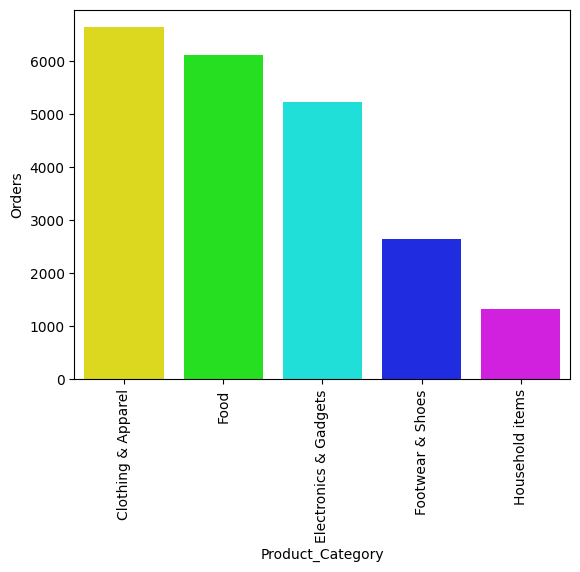

In [30]:
cate=df.groupby("Product_Category",as_index=False)["Orders"].sum().sort_values("Orders",ascending=False).head(5)
sns.barplot(x="Product_Category",y="Orders",data=cate,palette="hsv")
plt.xticks(rotation=90)
plt.show()

# Top 5 product category by Sales

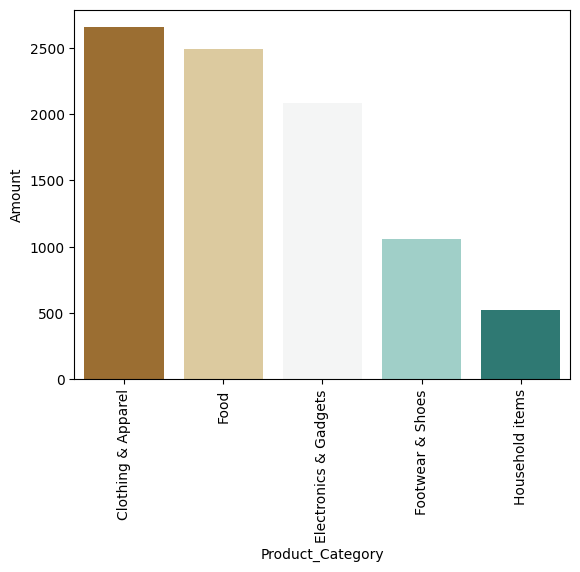

In [32]:
top=df.groupby("Product_Category",as_index=False)["Amount"].count().sort_values("Amount",ascending=False).head(5)
sns.barplot(x="Product_Category",y="Amount",data=top,palette="BrBG")
plt.xticks(rotation=90)
plt.show()

# Top 10 Customers by sales

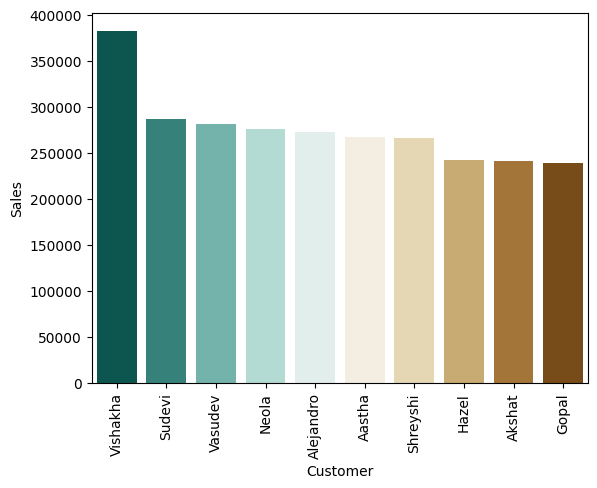

In [126]:
cust_sales=df.groupby("Cust_name",as_index=False)["Amount"].sum().sort_values("Amount",ascending=False).head(10)
sns.barplot(x="Cust_name",y="Amount",data=cust_sales,palette="BrBG_r")
plt.xticks(rotation=90)
plt.ylabel("Sales")
plt.xlabel("Customer")
plt.show()

# Top 10 Customers by orders

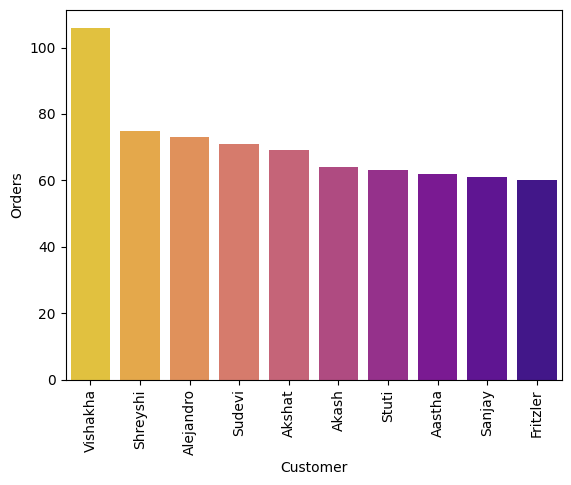

In [36]:
cust_orders=df.groupby("Cust_name",as_index=False)["Orders"].sum().sort_values("Orders",ascending=False).head(10)
sns.barplot(x="Cust_name",y="Orders",data=cust_orders,palette="plasma_r")
plt.xticks(rotation=90)
plt.ylabel("Orders")
plt.xlabel("Customer")
plt.show()

# Top 10 most ordered product

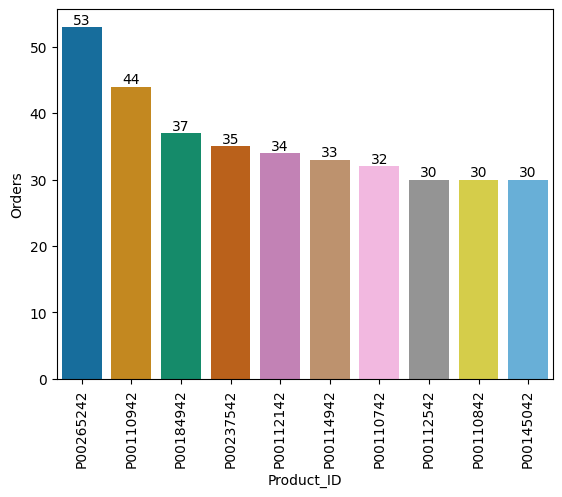

In [128]:
mop=df.groupby("Product_ID",as_index=False)["Orders"].count().sort_values("Orders",ascending=False).head(10)
lab=sns.barplot(x="Product_ID",y="Orders",data=mop,palette="colorblind")
for bar in lab.containers:
    lab.bar_label(bar)
plt.xticks(rotation=90)
plt.show()

# Top 10 Highest Sales Product

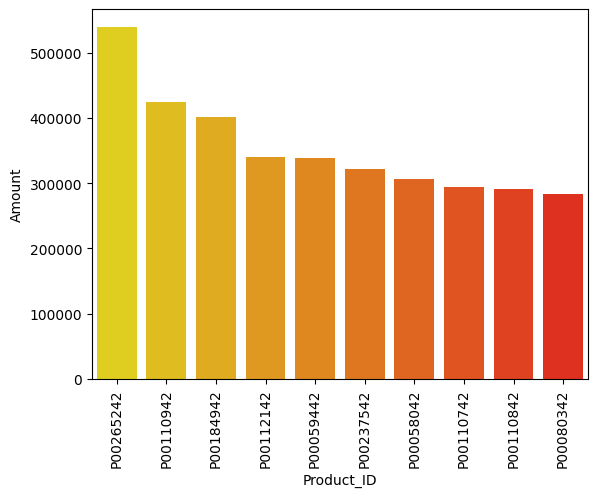

In [70]:
hsp=df.groupby("Product_ID",as_index=False)["Amount"].sum().sort_values("Amount",ascending=False).head(10)
lab=sns.barplot(x="Product_ID",y="Amount",data=hsp,palette="autumn_r")
plt.xticks(rotation=90)
plt.show()